In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data chromosome

In [7]:
df = pd.read_csv('/home/fer/Documents/Code/cfDNA_Code/Jupyter/example_data_chromosome_general.csv')
df

,chr,start,end
0,chr1,1,249250621
1,chr2,1,243199373
2,chr3,1,198022430
3,chr4,1,191154276
4,chr5,1,180915260
5,chr6,1,171115067
6,chr7,1,159138663
7,chr8,1,146364022
8,chr9,1,141213431
9,chr10,1,135534747


In [8]:
def sum_rows (end_0, end_i):
    start = end_0 +1
    end = start +1 + end_i
    return start, end

In [9]:
i = 1

df_new = pd.DataFrame(columns = list(df.columns.values))
df_new = df_new.append({'chr':df['chr'][0], 'start':df['start'][0], 'end':df['end'][0]}, ignore_index=True)
#print(df_new)
while i < len(df):
    if i == 1:
        start, end = sum_rows(df_new['end'][i-1], df['end'][i])
    else:
        start, end = sum_rows(df_new['end'][i-1], df['end'][i])
        
    df_new = df_new.append({'chr':df['chr'][i], 'start':start, 'end':end}, ignore_index=True)
    i = i + 1
df_new

/tmp/ipykernel_4713/2917642616.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'chr':df['chr'][0], 'start':df['start'][0], 'end':df['end'][0]}, ignore_index=True)
/tmp/ipykernel_4713/2917642616.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'chr':df['chr'][i], 'start':start, 'end':end}, ignore_index=True)
/tmp/ipykernel_4713/2917642616.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'chr':df['chr'][i], 'start':start, 'end':end}, ignore_index=True)
/tmp/ipykernel_4713/2917642616.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.appen

,chr,start,end
0,chr1,1,249250621
1,chr2,249250622,492449996
2,chr3,492449997,690472428
3,chr4,690472429,881626706
4,chr5,881626707,1062541968
5,chr6,1062541969,1233657037
6,chr7,1233657038,1392795702
7,chr8,1392795703,1539159726
8,chr9,1539159727,1680373159
9,chr10,1680373160,1815907908


In [10]:
df_new['value'] = [0] * len(df)

In [11]:
df_new

,chr,start,end,value
0,chr1,1,249250621,0
1,chr2,249250622,492449996,0
2,chr3,492449997,690472428,0
3,chr4,690472429,881626706,0
4,chr5,881626707,1062541968,0
5,chr6,1062541969,1233657037,0
6,chr7,1233657038,1392795702,0
7,chr8,1392795703,1539159726,0
8,chr9,1539159727,1680373159,0
9,chr10,1680373160,1815907908,0


# Data Frecuency

In [12]:
df_loss = pd.read_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_lite.csv')
#df_loss[df_loss['chr']=='chr2']
df_loss

,chr,start,end,value
0,chr1,1000001,1500000,3.0
1,chr1,1500001,2000000,3.0
2,chr1,2000001,2500000,3.0
3,chr1,3000001,3500000,3.0
4,chr1,4000001,4500000,3.0
...,...,...,...,...
5224,chrX,150000001,150500000,0.0
5225,chrX,150500001,151000000,0.0
5226,chrX,151000001,151500000,0.0
5227,chrX,152500001,153000000,0.0


In [13]:
lst = []
lst_end = []
lst_chr = []
lst_val = []

for chrom, start, end in zip(df_new.chr, df_new.start, df_new.end):
    df_i = df_loss[df_loss['chr'] == chrom]
    
    for i,j,valor in zip(df_i.start, df_i.end, df_i.value):
        x = int(start) + int(i)
        
        print('la suma de: ' + str(start) + ' y ' + str(i) + ' en el cromosoma: '+ chrom +
             ' = ' + str(x) + ' con su valor: ' +  str(valor))
        
        lst.append(x)
        
        lst_end.append(int(start) + int(j))
        lst_chr.append(chrom)
        lst_val.append(valor)

df_loss_final = pd.DataFrame({'chr': lst_chr, 'start': lst, 'end': lst_end,'value': lst_val})
df_loss_final

la suma de: 1 y 1000001 en el cromosoma: chr1 = 1000002 con su valor: 3.0
la suma de: 1 y 1500001 en el cromosoma: chr1 = 1500002 con su valor: 3.0
la suma de: 1 y 2000001 en el cromosoma: chr1 = 2000002 con su valor: 3.0
la suma de: 1 y 3000001 en el cromosoma: chr1 = 3000002 con su valor: 3.0
la suma de: 1 y 4000001 en el cromosoma: chr1 = 4000002 con su valor: 3.0
la suma de: 1 y 4500001 en el cromosoma: chr1 = 4500002 con su valor: 3.0
la suma de: 1 y 5000001 en el cromosoma: chr1 = 5000002 con su valor: 3.0
la suma de: 1 y 5500001 en el cromosoma: chr1 = 5500002 con su valor: 3.0
la suma de: 1 y 6000001 en el cromosoma: chr1 = 6000002 con su valor: 3.0
la suma de: 1 y 6500001 en el cromosoma: chr1 = 6500002 con su valor: 3.0
la suma de: 1 y 7000001 en el cromosoma: chr1 = 7000002 con su valor: 3.0
la suma de: 1 y 7500001 en el cromosoma: chr1 = 7500002 con su valor: 3.0
la suma de: 1 y 8000001 en el cromosoma: chr1 = 8000002 con su valor: 3.0
la suma de: 1 y 8500001 en el cromosom

,chr,start,end,value
0,chr1,1000002,1500001,3.0
1,chr1,1500002,2000001,3.0
2,chr1,2000002,2500001,3.0
3,chr1,3000002,3500001,3.0
4,chr1,4000002,4500001,3.0
...,...,...,...,...
5224,chrX,3031033330,3031533329,0.0
5225,chrX,3031533330,3032033329,0.0
5226,chrX,3032033330,3032533329,0.0
5227,chrX,3033533330,3034033329,0.0


In [14]:
df_loss_final[df_loss_final['start'] == 491750623]

,chr,start,end,value
861,chr2,491750623,492250622,0.0


In [15]:
def negative (numero):
    n = numero * -1
    return n
df_loss_final['value'] = list(map(negative, df_loss_final['value']))
df_loss_final

,chr,start,end,value
0,chr1,1000002,1500001,-3.0
1,chr1,1500002,2000001,-3.0
2,chr1,2000002,2500001,-3.0
3,chr1,3000002,3500001,-3.0
4,chr1,4000002,4500001,-3.0
...,...,...,...,...
5224,chrX,3031033330,3031533329,-0.0
5225,chrX,3031533330,3032033329,-0.0
5226,chrX,3032033330,3032533329,-0.0
5227,chrX,3033533330,3034033329,-0.0


In [16]:
df_gain = pd.read_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_gain.csv')
df_gain

,chr,start,end,value
0,chr1,1000001,1500000,0.0
1,chr1,1500001,2000000,0.0
2,chr1,2000001,2500000,0.0
3,chr1,3000001,3500000,0.0
4,chr1,4000001,4500000,0.0
...,...,...,...,...
5224,chrX,150000001,150500000,0.0
5225,chrX,150500001,151000000,0.0
5226,chrX,151000001,151500000,0.0
5227,chrX,152500001,153000000,0.0


In [20]:
df_gain[df_gain['value']>0]

,chr,start,end,value
3959,chr6,28500001,29000000,20.0
3960,chr6,29000001,29500000,20.0
3961,chr6,29500001,30000000,20.0
3962,chr6,30000001,30500000,20.0
3963,chr6,30500001,31000000,20.0
3964,chr6,31000001,31500000,20.0
3965,chr6,31500001,32000000,20.0
3966,chr6,32000001,32500000,20.0
3967,chr6,32500001,33000000,20.0
3968,chr6,33000001,33500000,20.0


In [154]:
lst = []
lst_end = []
lst_chr = []
lst_val = []

for chrom, start, end in zip(df_new.chr, df_new.start, df_new.end):
    df_i = df_gain[df_gain['chr'] == chrom]
    
    for i,j,valor in zip(df_i.start, df_i.end, df_i.value):
        x = int(start) + int(i)
        
        print('la suma de: ' + str(start) + ' y ' + str(i) + ' en el cromosoma: '+ chrom +
             ' = ' + str(x) + ' con su valor: ' +  str(valor))
        
        lst.append(x)
        
        lst_end.append(int(start) + int(j))
        lst_chr.append(chrom)
        lst_val.append(valor)

df_gain_final = pd.DataFrame({'chr': lst_chr, 'start': lst, 'end': lst_end,'value': lst_val})
df_gain_final

la suma de: 1 y 1000001 en el cromosoma: chr1 = 1000002 con su valor: 0.0
la suma de: 1 y 1500001 en el cromosoma: chr1 = 1500002 con su valor: 0.0
la suma de: 1 y 2000001 en el cromosoma: chr1 = 2000002 con su valor: 0.0
la suma de: 1 y 3000001 en el cromosoma: chr1 = 3000002 con su valor: 0.0
la suma de: 1 y 4000001 en el cromosoma: chr1 = 4000002 con su valor: 0.0
la suma de: 1 y 4500001 en el cromosoma: chr1 = 4500002 con su valor: 0.0
la suma de: 1 y 5000001 en el cromosoma: chr1 = 5000002 con su valor: 0.0
la suma de: 1 y 5500001 en el cromosoma: chr1 = 5500002 con su valor: 0.0
la suma de: 1 y 6000001 en el cromosoma: chr1 = 6000002 con su valor: 0.0
la suma de: 1 y 6500001 en el cromosoma: chr1 = 6500002 con su valor: 0.0
la suma de: 1 y 7000001 en el cromosoma: chr1 = 7000002 con su valor: 0.0
la suma de: 1 y 7500001 en el cromosoma: chr1 = 7500002 con su valor: 0.0
la suma de: 1 y 8000001 en el cromosoma: chr1 = 8000002 con su valor: 0.0
la suma de: 1 y 8500001 en el cromosom

,chr,start,end,value
0,chr1,1000002,1500001,0.0
1,chr1,1500002,2000001,0.0
2,chr1,2000002,2500001,0.0
3,chr1,3000002,3500001,0.0
4,chr1,4000002,4500001,0.0
...,...,...,...,...
5224,chrX,3031033330,3031533329,0.0
5225,chrX,3031533330,3032033329,0.0
5226,chrX,3032033330,3032533329,0.0
5227,chrX,3033533330,3034033329,0.0


# Final_Manual

In [155]:
#df_new = pd.read_csv('/home/fer/lenght_chromosome.csv')
#df_new

<AxesSubplot:xlabel='Chromosome', ylabel='Frequency'>

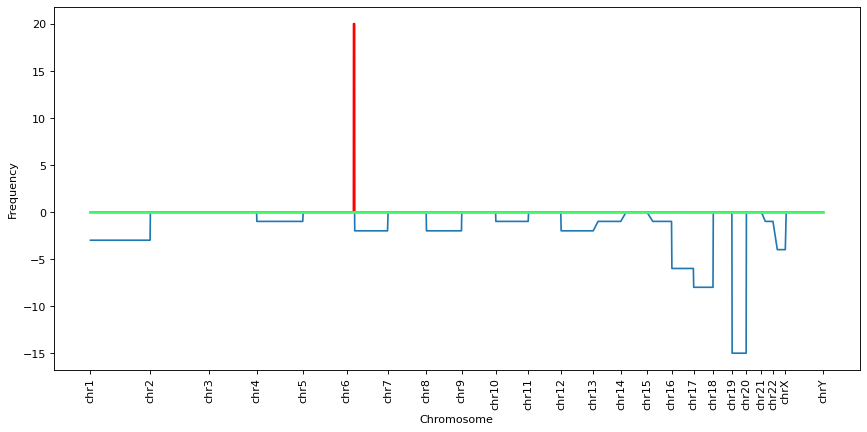

In [159]:
from matplotlib.pyplot import figure
figure(figsize=(13, 6), dpi=80)


sns.lineplot(data=df_loss_final, x="start", y="value")
sns.lineplot(data=df_gain_final, x="start", y="value", color='r')
p=sns.lineplot(data=df_new, x="start", y="value", color='#43f96c', linewidth=2.5)

p.set(xticks=list(df_new.start))
p.set_xticklabels(list(df_new.chr))
p.set_xticklabels(p.get_xticklabels(),rotation = 90)
p.set(xlabel = "Chromosome", ylabel = "Frequency")
p